In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pickle

In [3]:
df = pd.read_csv('data/TUANDROMD.csv')
df

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.isna().sum()

ACCESS_ALL_DOWNLOADS                                        1
ACCESS_CACHE_FILESYSTEM                                     1
ACCESS_CHECKIN_PROPERTIES                                   1
ACCESS_COARSE_LOCATION                                      1
ACCESS_COARSE_UPDATES                                       1
                                                           ..
Landroid/telephony/TelephonyManager;->getSimOperatorName    1
Landroid/telephony/TelephonyManager;->getSimCountryIso      1
Landroid/telephony/TelephonyManager;->getSimSerialNumber    1
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    1
Label                                                       1
Length: 242, dtype: int64

In [5]:
df = df.dropna()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Label'], axis=1), df['Label'], test_size=0.2, random_state=42)

In [12]:
X_test.to_csv('data/X_test.csv', index=False)

## Logistic regression

In [7]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [8]:
print(classification_report(y_test, lr_model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       174
         1.0       0.99      0.99      0.99       719

    accuracy                           0.98       893
   macro avg       0.97      0.98      0.98       893
weighted avg       0.98      0.98      0.98       893


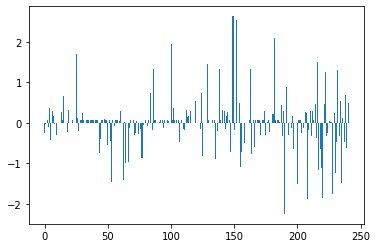

In [9]:
plt.bar(range(lr_model.coef_.size), lr_model.coef_[0]);

In [10]:
with open('models/lr_model.pickle', 'wb') as f:
    pickle.dump(lr_model, f)

## Random forest


In [47]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
print(classification_report(y_test, rf_model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       177
         1.0       1.00      0.99      1.00       716

    accuracy                           0.99       893
   macro avg       0.99      0.99      0.99       893
weighted avg       0.99      0.99      0.99       893


In [56]:
with open('models/rf_model.pickle', 'wb') as f:
    pickle.dump(rf_model, f)

## Gradient boosting

In [50]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [52]:
print(classification_report(y_test, gb_model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       177
         1.0       0.99      0.99      0.99       716

    accuracy                           0.99       893
   macro avg       0.98      0.98      0.98       893
weighted avg       0.99      0.99      0.99       893


In [57]:
with open('models/gb_model.pickle', 'wb') as f:
    pickle.dump(gb_model, f)